# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | coquimbo
Processing Record 2 of Set 1 | ploudalmezeau
Processing Record 3 of Set 1 | recani
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | temryuk
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | eraan
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | ayvacik
Processing Record 10 of Set 1 | yeppoon
Processing Record 11 of Set 1 | baissa
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | bacalar
Processing Record 14 of Set 1 | mablethorpe
City not found. Skipping...
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | pama
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | quepos
Processing Record 19 of Set 1 | labuan
Processing Record 20 of Set 1 | howard springs
Processing Record 21 of Set 1 | nova sintra
Processing Record 22 of Set 1 | melfort
Processing Rec

Processing Record 40 of Set 4 | bargara
City not found. Skipping...
Processing Record 41 of Set 4 | mpika
Processing Record 42 of Set 4 | kruisfontein
Processing Record 43 of Set 4 | dudinka
Processing Record 44 of Set 4 | sake
Processing Record 45 of Set 4 | afaahiti
Processing Record 46 of Set 4 | yamada
Processing Record 47 of Set 4 | ouellah
City not found. Skipping...
Processing Record 48 of Set 4 | ebon
Processing Record 49 of Set 4 | uvalde
Processing Record 0 of Set 5 | vilyuchinsk
Processing Record 1 of Set 5 | sao vicente
Processing Record 2 of Set 5 | betio village
Processing Record 3 of Set 5 | la ronge
Processing Record 4 of Set 5 | eskhar
Processing Record 5 of Set 5 | port lincoln
Processing Record 6 of Set 5 | genhe
Processing Record 7 of Set 5 | choyr
Processing Record 8 of Set 5 | luanda
Processing Record 9 of Set 5 | inari
Processing Record 10 of Set 5 | tsiombe
Processing Record 11 of Set 5 | anadyr
Processing Record 12 of Set 5 | olonkinbyen
Processing Record 13 of

Processing Record 30 of Set 8 | burgos
Processing Record 31 of Set 8 | manadhoo
Processing Record 32 of Set 8 | cooma
Processing Record 33 of Set 8 | urangan
Processing Record 34 of Set 8 | madimba
Processing Record 35 of Set 8 | malvan
Processing Record 36 of Set 8 | magadan
Processing Record 37 of Set 8 | amga
Processing Record 38 of Set 8 | nova vicosa
Processing Record 39 of Set 8 | yeniseysk
Processing Record 40 of Set 8 | dunedin
Processing Record 41 of Set 8 | zemio
Processing Record 42 of Set 8 | buarcos
Processing Record 43 of Set 8 | murghob
Processing Record 44 of Set 8 | borgarnes
Processing Record 45 of Set 8 | qasr-e qand
City not found. Skipping...
Processing Record 46 of Set 8 | sao joao da barra
Processing Record 47 of Set 8 | sonsorol village
City not found. Skipping...
Processing Record 48 of Set 8 | truro
Processing Record 49 of Set 8 | tarko-sale
Processing Record 0 of Set 9 | maintirano
Processing Record 1 of Set 9 | ancud
Processing Record 2 of Set 9 | chorbane
P

Processing Record 20 of Set 12 | san sebastian de la gomera
Processing Record 21 of Set 12 | sebeta
Processing Record 22 of Set 12 | codrington
Processing Record 23 of Set 12 | horseheads
Processing Record 24 of Set 12 | tocoa
Processing Record 25 of Set 12 | noumea
Processing Record 26 of Set 12 | toga village
City not found. Skipping...
Processing Record 27 of Set 12 | kutum
Processing Record 28 of Set 12 | acapulco de juarez
Processing Record 29 of Set 12 | khash
Processing Record 30 of Set 12 | dzilam gonzalez
Processing Record 31 of Set 12 | mutoko
Processing Record 32 of Set 12 | lincoln city
Processing Record 33 of Set 12 | chimore
Processing Record 34 of Set 12 | cabinda
Processing Record 35 of Set 12 | hammerfest
Processing Record 36 of Set 12 | swakopmund
Processing Record 37 of Set 12 | teknaf
Processing Record 38 of Set 12 | kotido
Processing Record 39 of Set 12 | cayeli
Processing Record 40 of Set 12 | ghatanji
Processing Record 41 of Set 12 | olinda
Processing Record 42 o

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coquimbo,-29.9533,-71.3436,12.85,100,100,1.54,CL,1695208483
1,ploudalmezeau,48.5333,-4.6500,17.14,100,100,10.80,FR,1695208751
2,recani,31.2846,-4.2688,29.20,31,0,0.63,MA,1695208751
3,albany,42.6001,-73.9662,9.23,92,44,1.92,US,1695208751
4,temryuk,45.2722,37.3811,27.12,25,0,2.97,RU,1695208751


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,coquimbo,-29.9533,-71.3436,12.85,100,100,1.54,CL,1695208483
1,ploudalmezeau,48.5333,-4.6500,17.14,100,100,10.80,FR,1695208751
2,recani,31.2846,-4.2688,29.20,31,0,0.63,MA,1695208751
3,albany,42.6001,-73.9662,9.23,92,44,1.92,US,1695208751
4,temryuk,45.2722,37.3811,27.12,25,0,2.97,RU,1695208751


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

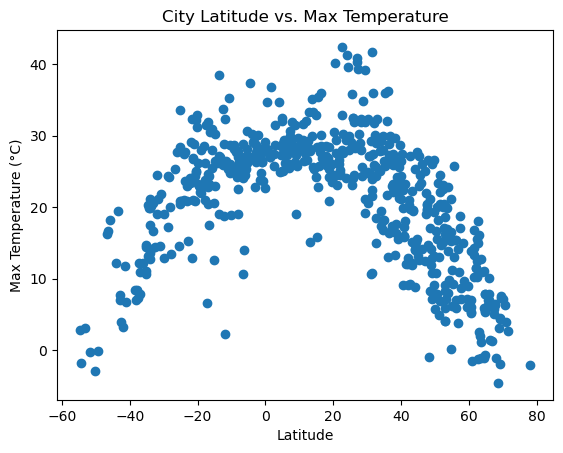

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

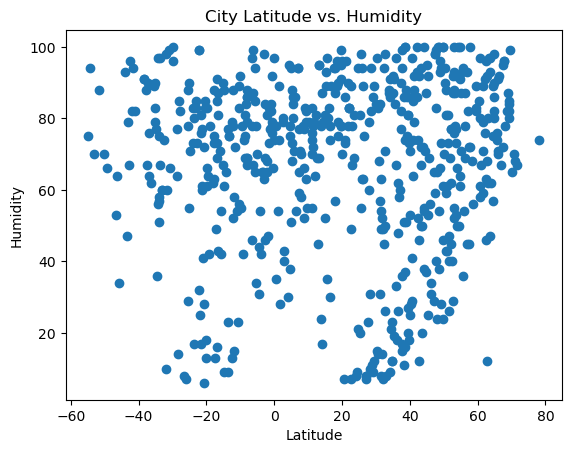

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

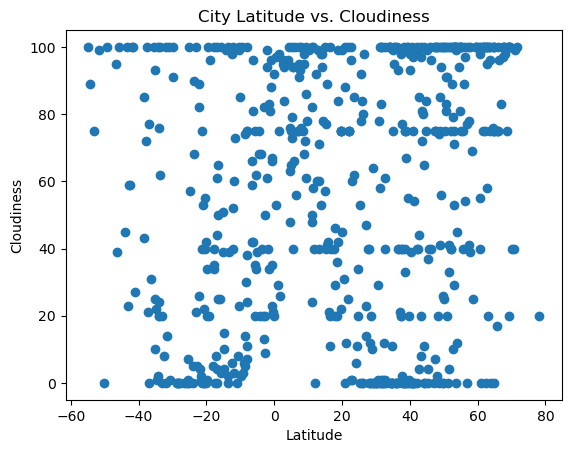

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

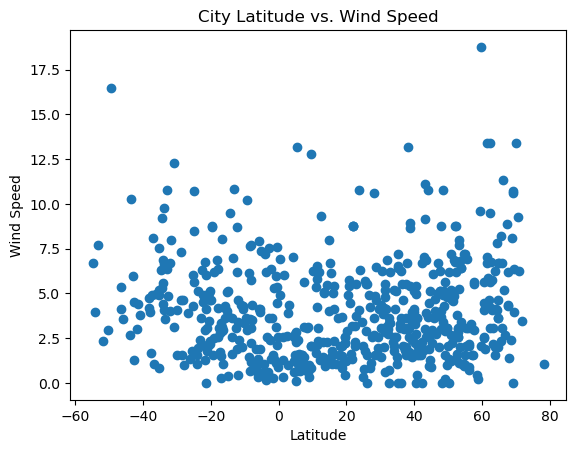

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def custom_linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"Correlation coefficient (r): {r[0]:.2f}")
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regression_values = x * slope + intercept
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.plot(x, regression_values, "r-")
    plt.annotate(equation, eqn_coordinates, fontsize=10, color="blue")
    plt.scatter(x, y)
    plt.xlabel(x.name)
    plt.ylabel(y.name)

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ploudalmezeau,48.5333,-4.6500,17.14,100,100,10.80,FR,1695208751
2,recani,31.2846,-4.2688,29.20,31,0,0.63,MA,1695208751
3,albany,42.6001,-73.9662,9.23,92,44,1.92,US,1695208751
4,temryuk,45.2722,37.3811,27.12,25,0,2.97,RU,1695208751
6,eraan,9.0629,117.7016,27.34,83,72,1.00,PH,1695208751


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]  < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,coquimbo,-29.9533,-71.3436,12.85,100,100,1.54,CL,1695208483
5,adamstown,-25.0660,-130.1015,20.49,90,100,5.63,PN,1695208751
7,saint-philippe,-21.3585,55.7679,26.77,77,40,6.03,RE,1695208751
9,yeppoon,-23.1333,150.7333,20.88,85,21,2.41,AU,1695208752
11,carnarvon,-24.8667,113.6333,20.90,71,57,10.71,AU,1695208752


###  Temperature vs. Latitude Linear Regression Plot

Correlation coefficient (r): -0.77


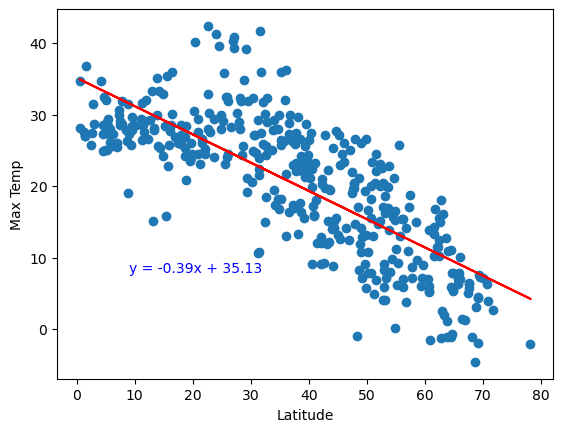

In [47]:
# Linear regression on Northern Hemisphere
import scipy.stats as st

custom_linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (9, 8))

Correlation coefficient (r): 0.72


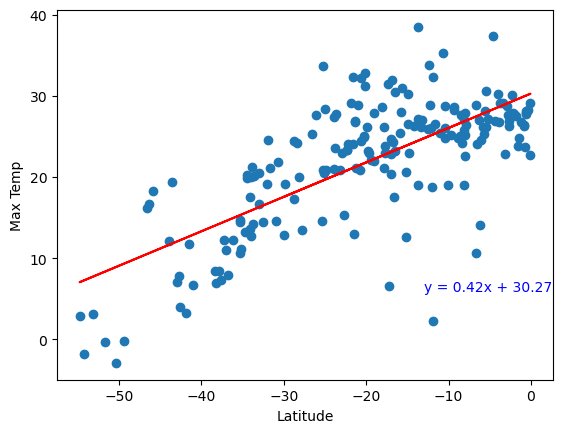

In [45]:
# Linear regression on Southern Hemisphere
custom_linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-13, 6))

**Discussion about the linear relationship:** The Southern Hemisphere exhibits a positive correlation (r ≈ 0.72) between latitude and maximum temperature, indicating that temperatures tend to increase as one moves closer to the equator. This relationship aligns with the expectation that regions nearer the equator experience higher temperatures due to more direct sunlight.

### Humidity vs. Latitude Linear Regression Plot

Correlation coefficient (r): 0.08


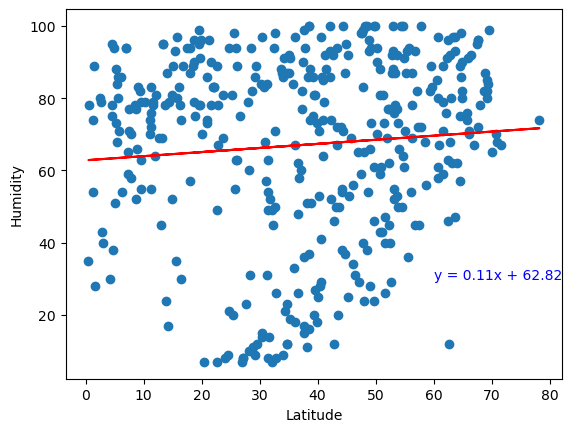

In [40]:
# Northern Hemisphere
custom_linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (60, 30))

Correlation coefficient (r): -0.04


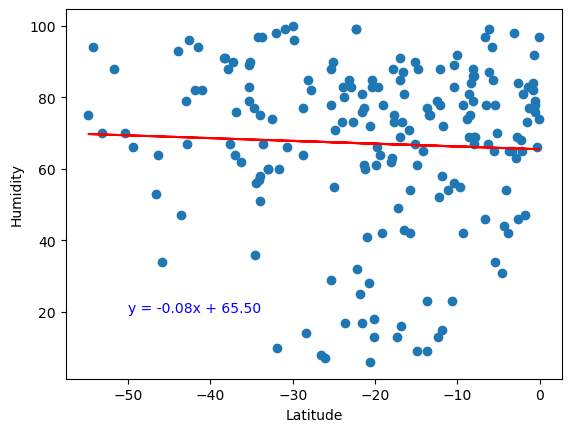

In [62]:
# Southern Hemisphere
custom_linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-50, 20))

**Discussion about the linear relationship:** The calculated correlation coefficient (r-value) of approximately 0.00028 indicates a very weak and almost negligible linear relationship between latitude and humidity in the Southern Hemisphere. This means that there is essentially no significant linear pattern between these two variables in the Southern Hemisphere based on the dataset and analysis performed.

### Cloudiness vs. Latitude Linear Regression Plot

Correlation coefficient (r): 0.08


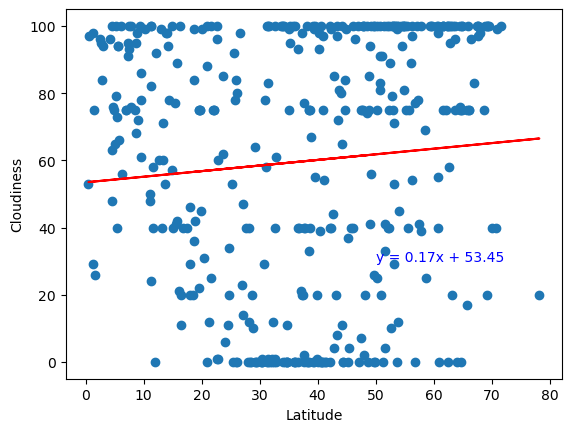

In [49]:
# Northern Hemisphere
custom_linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (50, 30))

Correlation coefficient (r): -0.05


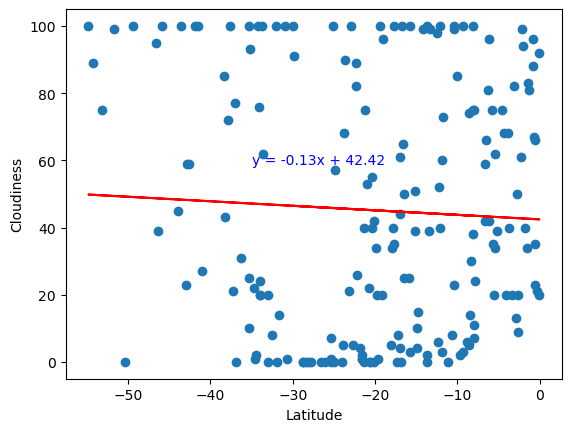

In [60]:
# Southern Hemisphere
custom_linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-35, 59))

**Discussion about the linear relationship:** Both cases show very weak correlations (0.08 & -0.05), implying that latitude and cloudiness are not strongly linked, and other factors likely play a more significant role in determining cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

Correlation coefficient (r): 0.22


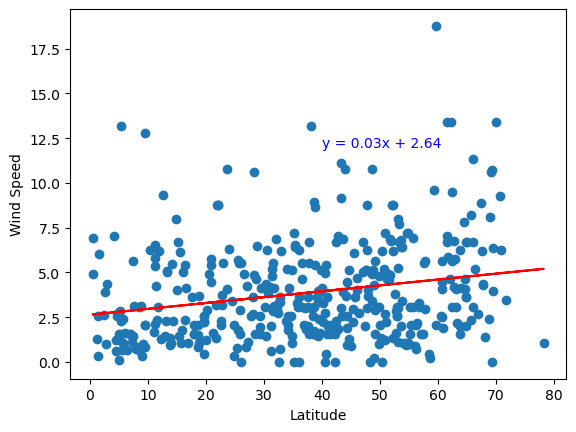

In [52]:
# Northern Hemisphere
custom_linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (40, 12))

Correlation coefficient (r): -0.26


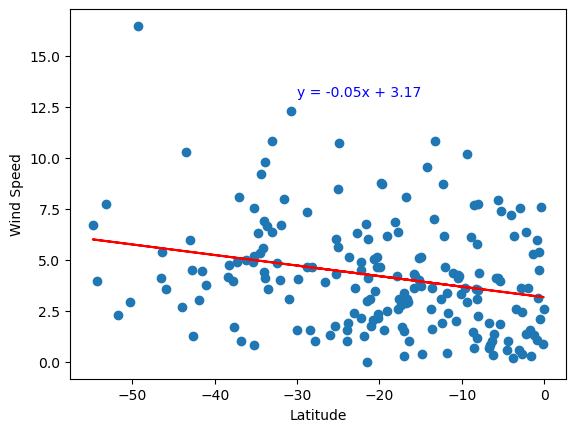

In [61]:
# Southern Hemisphere
custom_linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-30, 13))

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a weak positive linear relationship between latitude and wind speed, with a correlation coefficient of approximately 0.22, indicating a slight increase in wind speed as you move away from the equator.

In the Southern Hemisphere, there is a weak negative linear relationship between latitude and wind speed, with a correlation coefficient of approximately -0.26, suggesting a slight decrease in wind speed as you move further from the equator.